<a href="https://colab.research.google.com/github/jeosol/aiml/blob/main/mnist_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%tensorflow_version 2.x

In [30]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist


In [4]:
data = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
(X_train_full, y_train_full), (X_test, y_test) = data

In [9]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [10]:
y_train[0]

4

In [12]:
model = keras.models.Sequential()

In [13]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4230 - accuracy: 0.8519 - val_loss: 0.4000 - val_accuracy: 0.8662
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4017 - accuracy: 0.8585 - val_loss: 0.3975 - val_accuracy: 0.8636
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3838 - accuracy: 0.8644 - val_loss: 0.3675 - val_accuracy: 0.8748
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3683 - accuracy: 0.8688 - val_loss: 0.3674 - val_accuracy: 0.8714
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3557 - accuracy: 0.8733 - val_loss: 0.3549 - val_accuracy: 0.8752
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3449 - accuracy: 0.8758 - val_loss: 0.3498 - val_accuracy: 0.8782
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3358 - accuracy: 0.8800 - val_loss: 0.3712 - val_accuracy:

In [23]:
import pandas as pd
df = pd.DataFrame(history.history)

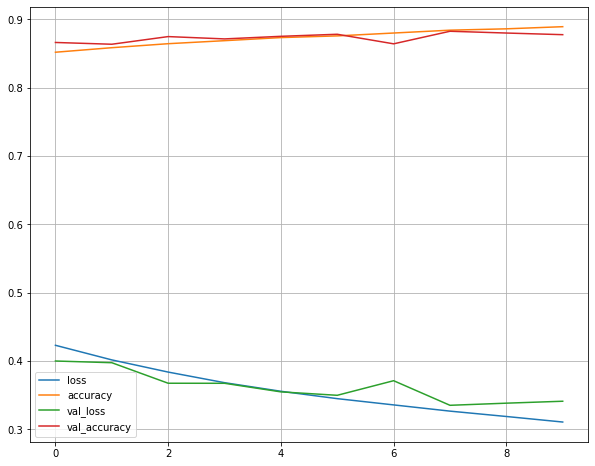

In [28]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,8))
plt.grid(True)
